In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
import yfinance as yf


In [2]:

ticker = 'AAPL'
stock_data = yf.download(ticker, start='2023-01-01', end='2024-01-01')


stock_data = stock_data[['Close']]
stock_data.dropna(inplace=True)
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

                 Close
Date                  
2023-01-03  125.070000
2023-01-04  126.360001
2023-01-05  125.019997
2023-01-06  129.619995
2023-01-09  130.149994



C:\Users\smoni\AppData\Local\Temp\ipykernel_2340\189001102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.dropna(inplace=True)


In [3]:

stock_data['Next_Close'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)


X = stock_data[['Close']].values 
y = stock_data['Next_Close'].values 

split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


C:\Users\smoni\AppData\Local\Temp\ipykernel_2340\2101622617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Next_Close'] = stock_data['Close'].shift(-1)
C:\Users\smoni\AppData\Local\Temp\ipykernel_2340\2101622617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.dropna(inplace=True)


In [4]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

In [5]:

y_pred = linear_regression.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

direction_accuracy = np.mean((y_pred > X_test.flatten()) == (y_test > X_test.flatten())) * 100
print(f"Direction Accuracy: {direction_accuracy:.2f}%")


Mean Squared Error: 3.48
Direction Accuracy: 52.00%


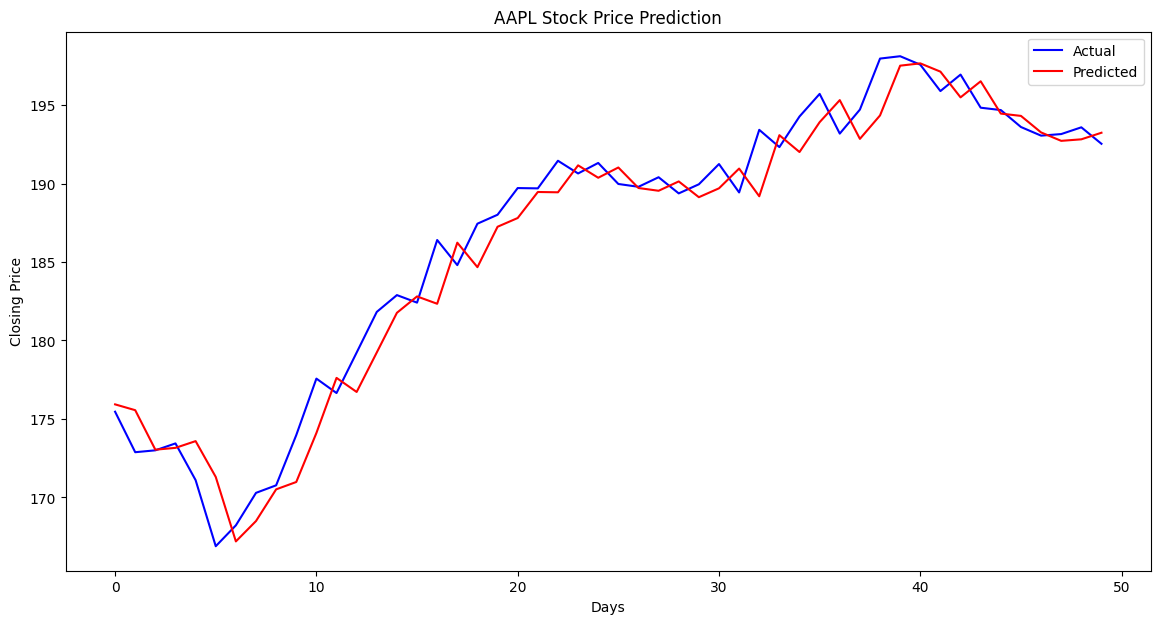

In [7]:
# Plot the actual vs. predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.legend()
plt.show()
